<a href="https://colab.research.google.com/github/amena-ss/EDA_Project/blob/main/EDA_Project_MTA_%26_Crime_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
    
week_nums = [201003, 201010, 201017, 201024, 201031, 201107, 201114, 201121, 201128, 201205, 201212, 201219, 201226]
turnstiles_df = get_data(week_nums)

In [ ]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2738673 entries, 0 to 212298
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [ ]:
turnstiles_df.describe

<bound method NDFrame.describe of           C/A  ... EXITS                                                               
0        A002  ...                                            2538694                  
1        A002  ...                                            2538697                  
2        A002  ...                                            2538712                  
3        A002  ...                                            2538767                  
4        A002  ...                                            2538795                  
...       ...  ...                                                ...                  
212294  TRAM2  ...                                                541                  
212295  TRAM2  ...                                                541                  
212296  TRAM2  ...                                                541                  
212297  TRAM2  ...                                                541                 

In [ ]:
turnstiles_df.corr()

,ENTRIES,EXITS
ENTRIES,1.000000,0.782164
EXITS,0.782164,1.000000


In [ ]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795


In [ ]:
group_station = turnstiles_df.groupby('STATION')['ENTRIES'].sum().sort_values(ascending=False)
group_station.head(10)

#"The first analysis was based on those data"

STATION
42 ST-PORT AUTH    4140187576583
DEKALB AV          3613632630509
161/YANKEE STAD    3325900044112
23 ST              3173370750957
125 ST             3106303435598
34 ST-PENN STA     2597012130391
183 ST             2519637204514
CANAL ST           2229617193893
18 AV              2122419899320
CHAMBERS ST        2110340692807
Name: ENTRIES, dtype: int64

In [ ]:
turnstiles_df.groupby(['UNIT','SCP'])['STATION'].nunique().sort_values()

UNIT  SCP     
R001  00-00-00    1
R270  00-05-00    1
      00-00-03    1
      00-00-02    1
      00-00-01    1
                 ..
R112  01-06-01    1
      01-06-00    1
      01-05-01    1
R113  00-00-04    1
R572  01-03-04    1
Name: STATION, Length: 5020, dtype: int64

In [ ]:
turnstiles_df.DATE.value_counts().sort_index()

09/26/2020    29629
09/27/2020    30061
09/28/2020    31659
09/29/2020    29552
09/30/2020    29691
              ...  
12/21/2020    29727
12/22/2020    30099
12/23/2020    29871
12/24/2020    30014
12/25/2020    30150
Name: DATE, Length: 91, dtype: int64

In [ ]:
turnstiles_df.sort_values(by=['DATE'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
40669,J003,R352,00-03-00,HEWES ST,JM,BMT,09/26/2020,09:00:00,REGULAR,291116,117072
40670,J003,R352,00-03-00,HEWES ST,JM,BMT,09/26/2020,13:00:00,REGULAR,291146,117087
40671,J003,R352,00-03-00,HEWES ST,JM,BMT,09/26/2020,17:00:00,REGULAR,291181,117114
40672,J003,R352,00-03-00,HEWES ST,JM,BMT,09/26/2020,21:00:00,REGULAR,291210,117134
...,...,...,...,...,...,...,...,...,...,...,...
142443,R138,R293,00-02-02,34 ST-PENN STA,123ACE,IRT,12/25/2020,21:00:00,REGULAR,77951,42745
142480,R138,R293,00-02-03,34 ST-PENN STA,123ACE,IRT,12/25/2020,01:00:00,REGULAR,2344578,1624181
142481,R138,R293,00-02-03,34 ST-PENN STA,123ACE,IRT,12/25/2020,05:00:00,REGULAR,2344578,1624183
142483,R138,R293,00-02-03,34 ST-PENN STA,123ACE,IRT,12/25/2020,13:00:00,REGULAR,2344607,1624212


In [ ]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795
...,...,...,...,...,...,...,...,...,...,...,...
212294,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,04:00:00,REGULAR,5554,541
212295,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,08:00:00,REGULAR,5554,541
212296,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,12:00:00,REGULAR,5554,541
212297,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/25/2020,16:00:00,REGULAR,5554,541


In [ ]:
#The second try:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,00:00:00,REGULAR,7463495,2538694
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,04:00:00,REGULAR,7463500,2538697
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,08:00:00,REGULAR,7463516,2538712
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,12:00:00,REGULAR,7463552,2538767
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/26/2020,16:00:00,REGULAR,7463664,2538795


In [ ]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205285,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/26/2020,00:00:00,REGULAR,15657833,3459102
205286,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/26/2020,04:00:00,REGULAR,15657834,3459105
205287,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/26/2020,08:00:00,REGULAR,15657967,3459111
205288,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/26/2020,12:00:00,REGULAR,15658146,3459137
205289,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,09/26/2020,16:00:00,REGULAR,15658287,3459177


In [ ]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
75155,H014,R249,00-00-00,GRAHAM AV,11/23/2020,213
75337,H014,R249,00-00-02,GRAHAM AV,11/23/2020,213
75246,H014,R249,00-00-01,GRAHAM AV,11/23/2020,212
415162,R527,R122,00-03-01,90 ST-ELMHURST,10/03/2020,95
415435,R527,R122,00-03-04,90 ST-ELMHURST,10/03/2020,95


In [ ]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [ ]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "09/27/2020")]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS
1434,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,00:00:00,466066,1599154
1435,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,04:00:00,466068,1599154
1436,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,08:00:00,466071,1599158
1437,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,12:00:00,466075,1599167
1438,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,16:00:00,466085,1599190
1439,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,09/27/2020,20:00:00,466106,1599207


In [ ]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [ ]:
turnstiles_daily.sort_values(['ENTRIES'],ascending=False).groupby('STATION').sum()

,ENTRIES
STATION,
1 AV,42126830761
103 ST,12376851122
103 ST-CORONA,5767516144
104 ST,153938493993
110 ST,3741838788
...,...
WOODLAWN,2970035417
WORLD TRADE CTR,145772928189
WTC-CORTLANDT,67127295497


In [ ]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,09/26/2020,7463495,NaN,NaN
1,A002,R051,02-00-00,59 ST,09/27/2020,7463865,09/26/2020,7463495.0
2,A002,R051,02-00-00,59 ST,09/28/2020,7464115,09/27/2020,7463865.0
3,A002,R051,02-00-00,59 ST,09/29/2020,7464584,09/28/2020,7464115.0
4,A002,R051,02-00-00,59 ST,09/30/2020,7465109,09/29/2020,7464584.0


In [ ]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [ ]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,09/27/2020,885650078,09/26/2020,885650204.0
3551,A011,R080,01-03-00,57 ST-7 AV,09/28/2020,885649990,09/27/2020,885650078.0
3552,A011,R080,01-03-00,57 ST-7 AV,09/29/2020,885649806,09/28/2020,885649990.0
3553,A011,R080,01-03-00,57 ST-7 AV,09/30/2020,885649581,09/29/2020,885649806.0
3554,A011,R080,01-03-00,57 ST-7 AV,10/01/2020,885649356,09/30/2020,885649581.0


In [ ]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         90
A014  R081  02-00-00  49 ST               1
A025  R023  01-03-01  34 ST-HERALD SQ     1
A039  R085  01-00-00  8 ST-NYU            1
            01-03-01  8 ST-NYU            1
                                         ..
R627  R063  00-03-02  SUTTER AV-RUTLD     1
R647  R110  02-05-01  FLATBUSH AV-B.C     2
R728  R226  00-00-00  GUN HILL RD         1
            00-00-01  GUN HILL RD         1
R730  R431  00-00-04  EASTCHSTER/DYRE    90
Length: 206, dtype: int64

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

301 3055269.0
125 1630880.0
5 2642707.0
27 3963030.0
17 1309708904.0
58 2427404.0
18 1207629.0
97 1197880.0
262182 6657224.0
1 1264170.0
3 6494874.0
0 2822587.0
524338 67889725.0
660 475737962.0
119 631050303.0
183 3563454.0
164 3086977.0
22 1073810.0
77 15184858.0
33567756 143344.0
1610558710 10549248.0
25 3319790.0
106 2493899.0
300 7355346.0
170 8876685.0
1162 2419492.0
65 342505060.0
134277386 525023.0
458768 134277580.0
3 3251171.0
82 644689531.0
186 6817289.0
458797 1518041.0
23 134569732.0
5 2706974.0
96 1325340.0
76 3732124.0
40 1242136653.0
208 5912731.0
955056232 4994166.0
262159 955056815.0
524288 6946201.0
16 4845685.0
917504 67108864.0
15 2786841.0
275 2867655.0
100 1143527.0
163 42927133.0
15 4112456.0
51 5583005.0
18 6190574.0
351 6289174.0
109 2086973.0
18 1437665.0
625 2888810.0
28 13122515.0
5 2166564.0
37 1031347.0
357 5182683.0
196 10323540.0
10 6428987.0
5 7751347.0
579 16283598.0
96 3463890.0
592408 4715178.0
60 6478782.0
307 3953153.0
317 352621137.0
65547 235595

In [ ]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,09/27/2020,7463865,09/26/2020,7463495.0,370.0
2,A002,R051,02-00-00,59 ST,09/28/2020,7464115,09/27/2020,7463865.0,250.0
3,A002,R051,02-00-00,59 ST,09/29/2020,7464584,09/28/2020,7464115.0,469.0
4,A002,R051,02-00-00,59 ST,09/30/2020,7465109,09/29/2020,7464584.0,525.0
5,A002,R051,02-00-00,59 ST,10/01/2020,7465593,09/30/2020,7465109.0,484.0


In [ ]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,09/27/2020,2899.0
1,A002,R051,59 ST,09/28/2020,2112.0
2,A002,R051,59 ST,09/29/2020,4084.0
3,A002,R051,59 ST,09/30/2020,4659.0
4,A002,R051,59 ST,10/01/2020,4673.0


In [ ]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head(10)

,STATION,DATE,DAILY_ENTRIES
0,1 AV,09/27/2020,5063.0
1,1 AV,09/28/2020,3761.0
2,1 AV,09/29/2020,5602.0
3,1 AV,09/30/2020,6229.0
4,1 AV,10/01/2020,6571.0
5,1 AV,10/02/2020,7087.0
6,1 AV,10/03/2020,7080.0
7,1 AV,10/04/2020,5331.0
8,1 AV,10/05/2020,3904.0
9,1 AV,10/06/2020,6281.0


In [ ]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,3082301.0
1,34 ST-HERALD SQ,2944189.0
2,59 ST,2289213.0
3,125 ST,2107892.0
4,86 ST,2095087.0
5,CATHEDRAL PKWY,1958771.0
6,GRD CNTRL-42 ST,1893006.0
7,PATH NEW WTC,1883282.0
8,14 ST-UNION SQ,1872849.0
9,23 ST,1856797.0


In [ ]:
st= station_totals.head(10)

In [ ]:
station_totals.isna().sum()

STATION          0
DAILY_ENTRIES    0
dtype: int64

#Finding the MTA Station with the highest entries number to map it to the highest crime rate station in the second dataset.

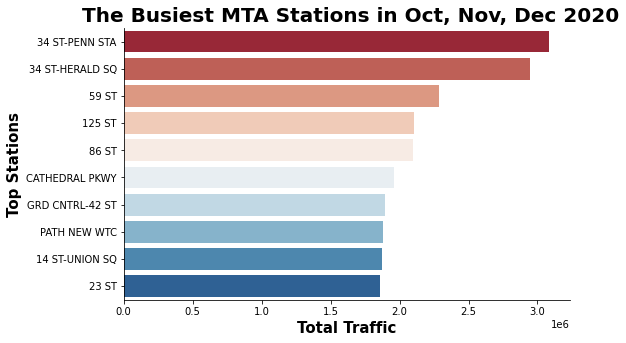

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data= station_totals.head(10).reset_index(),x='DAILY_ENTRIES',y='STATION',palette="RdBu")
plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Top Stations',weight='bold',fontsize=15)
plt.title(' The Busiest MTA Stations in Oct, Nov, Dec 2020', weight='bold', fontsize='20')
sns.despine()
plt.savefig('barplot.png',transparent=True, bbox_inches='tight')

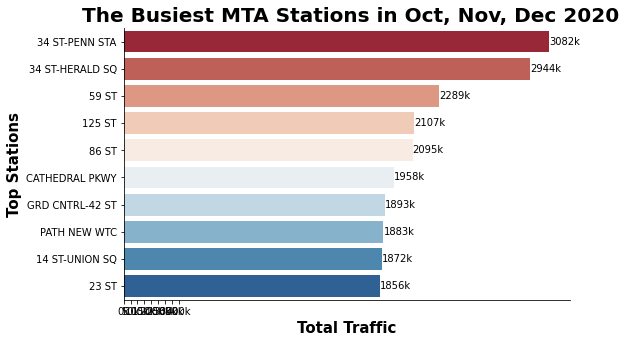

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data= station_totals.head(10).reset_index(),x='DAILY_ENTRIES',y='STATION',palette="RdBu")
plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Top Stations',weight='bold',fontsize=15)
plt.xticks(range(0,400001,50000),[str(int(i/1000))+'k' for i in range(0,400001,50000)])
plt.title(' The Busiest MTA Stations in Oct, Nov, Dec 2020', weight='bold', fontsize='20')
for p in ax.patches:
       ax.annotate(str(int(p.get_width()/1000))+'k', (p.get_width(), p.get_y()+0.5))
sns.despine()
plt.savefig('barplot.png',transparent=True, bbox_inches='tight')

Finding The time where those stations have the highest traffic to map it with the result of the highest crime rate stations.



```
```


---



---
#Crimes_Dataset_Analysis


In [ ]:
import numpy as np
import pandas as pd
import time
import sqlite3 as sql

In [88]:
conn = sql.connect("ss.db")

In [ ]:
sql= """ SELECT * FROM NYPD_Complaint """

In [ ]:
sql

' SELECT * FROM NYPD_Complaint '

In [98]:
df3= pd.read_sql( 'SELECT * FROM NYPD_Complaint' , sql.connect("ss.db"))

In [99]:
df3.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,field36,field37,field38,field39
0,437035202,10/03/2020,13:07:00,None,None,69,10/03/2020,101,MURDER & NON-NEGL. MANSLAUGHTER,None,None,COMPLETED,FELONY,None,OUTSIDE,None,N.Y. POLICE DEPT,None,None,None,None,1012601,175402,None,None,None,None,40.64807745300004,-73.89783444799998,"""(40.64807745300004","-73.89783444799998)""",None,None,18-24,BLACK,M,None,None,None
1,671080167,10/03/2020,00:34:00,10/03/2020,00:35:00,20,10/03/2020,105,ROBBERY,384,"""ROBBERY","POCKETBOOK/CARRIED BAG""",COMPLETED,FELONY,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,None,None,None,989408,223070,25-44,WHITE,M,None,40.77895861400003,-73.98137730999997,"""(40.77895861400003","-73.98137730999997)""",PATROL BORO MAN NORTH,None,18-24,WHITE,F,None,None
2,697548695,10/03/2020,05:14:00,12/30/2020,20:34:00,23,12/30/2020,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,None,None,664,998869,230618,UNKNOWN,UNKNOWN,U,None,40.799665264000055,-73.94719977999995,"""(40.799665264000055","-73.94719977999995)""",PATROL BORO MAN NORTH,None,25-44,UNKNOWN,F,None,None,None
3,849203188,10/03/2020,01:07:00,10/03/2020,03:30:00,61,12/23/2020,114,ARSON,264,"""ARSON","MOTOR VEHICLE 1 2 3 & 4""",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,OTHER,97,None,None,None,1002930,153521,UNKNOWN,UNKNOWN,M,None,40.58804433800003,-73.93274583799997,"""(40.58804433800003","-73.93274583799997)""",PATROL BORO BKLYN SOUTH,None,45-64,WHITE,F,None,None
4,529878300,10/03/2020,13:00:00,10/03/2020,16:00:00,114,12/21/2020,116,SEX CRIMES,168,SODOMY 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,None,None,None,1007654,219564,<18,UNKNOWN,M,None,40.76930608700008,-73.91550817999997,"""(40.76930608700008","-73.91550817999997)""",PATROL BORO QUEENS NORTH,None,<18,WHITE,F,None,None,None


Note: 
For the crimes dataset I got it from NYPD open data and this is not the whole dataset, I filtered it before downloding and chose the crimes that only happened at the period of 3 months "The same months that I got from the MTA dataset" and occured in the top 10 bussiest stations.

In [ ]:
 Crimes = pd.read_csv('NYPD_Complaint_Data_Historic (1).csv')
 crimes_rate = pd.DataFrame(Crimes)

In [ ]:
crimes_rate.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,437035202,10/03/2020,13:07:00,NaN,NaN,69,10/03/2020,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,NaN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,NaN,NaN,NaN,1012601,175402,NaN,NaN,NaN,NaN,40.648077,-73.897834,"(40.64807745300004, -73.89783444799998)",NaN,NaN,18-24,BLACK,M
1,671080167,10/03/2020,00:34:00,10/03/2020,00:35:00,20,10/03/2020,105,ROBBERY,384.0,"ROBBERY,POCKETBOOK/CARRIED BAG",COMPLETED,FELONY,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,989408,223070,25-44,WHITE,M,NaN,40.778959,-73.981377,"(40.77895861400003, -73.98137730999997)",PATROL BORO MAN NORTH,NaN,18-24,WHITE,F
2,697548695,10/03/2020,05:14:00,12/30/2020,20:34:00,23,12/30/2020,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2.0,NaN,NaN,664.0,998869,230618,UNKNOWN,UNKNOWN,U,NaN,40.799665,-73.947200,"(40.799665264000055, -73.94719977999995)",PATROL BORO MAN NORTH,NaN,25-44,UNKNOWN,F
3,849203188,10/03/2020,01:07:00,10/03/2020,03:30:00,61,12/23/2020,114,ARSON,264.0,"ARSON, MOTOR VEHICLE 1 2 3 & 4",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,OTHER,97.0,NaN,NaN,NaN,1002930,153521,UNKNOWN,UNKNOWN,M,NaN,40.588044,-73.932746,"(40.58804433800003, -73.93274583799997)",PATROL BORO BKLYN SOUTH,NaN,45-64,WHITE,F
4,529878300,10/03/2020,13:00:00,10/03/2020,16:00:00,114,12/21/2020,116,SEX CRIMES,168.0,SODOMY 1,COMPLETED,FELONY,QUEENS,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1007654,219564,<18,UNKNOWN,M,NaN,40.769306,-73.915508,"(40.76930608700008, -73.91550817999997)",PATROL BORO QUEENS NORTH,NaN,<18,WHITE,F


In [ ]:
!ls -a

 .    barplot.png  'NYPD_Complaint_Data_Historic (1).csv'   ss.db
 ..   .config	    sample_data


In [ ]:
type(Crimes)

pandas.core.frame.DataFrame

In [ ]:
crimes_rate.isna().sum()

In [ ]:
bf.isna().sum()

In [ ]:
crimes_rate.isna().sum().sum()

In [ ]:
crimes_rate

In [ ]:
crimes_rate.info()

In [ ]:
crimes_rate.columns

In [ ]:
df= crimes_rate.drop(['ADDR_PCT_CD', 'RPT_DT', 'OFNS_DESC',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO'],  axis = 1)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
df['CMPLNT_FR_DT']= pd.to_datetime(df['CMPLNT_FR_DT'])

In [ ]:
df.set_index('CMPLNT_FR_DT', inplace=True)

df.resample('w').mean()

In [ ]:
df.groupby(['CMPLNT_NUM', 'CMPLNT_FR_DT'])['STATION_NAME'].nunique().sort_values()

In [ ]:
crime_rate_daily = (df.groupby(["CMPLNT_NUM", "CMPLNT_FR_DT", "KY_CD", "STATION_NAME", "PD_CD"],as_index=False)
                        .CMPLNT_NUM.first())

In [ ]:
crime_rate_daily

In [ ]:
sum_crime= df.count()

In [ ]:
sum_crime

In [ ]:
ff=df.sort_values(['KY_CD'],ascending=False).groupby('STATION_NAME').sum()

In [ ]:
bf=(df.groupby(["STATION_NAME"])
 .CMPLNT_NUM.count()
 .reset_index()
 .sort_values("CMPLNT_NUM", ascending=False)).head(10)

In [ ]:
bf

In [ ]:
plt.figure(figsize=[8,5])
ax = sns.barplot(data= bf.reset_index(), x='CMPLNT_NUM',y='STATION_NAME',palette="vlag")
plt.xlabel('Crime Rate',weight='bold',fontsize=15)
plt.ylabel('Top Stations',weight='bold',fontsize=15)
plt.title('Stations with High Crime Rate by NYPD', weight='bold', fontsize='20')
sns.despine()
plt.savefig('barplot.png',transparent=True, bbox_inches='tight')

In [ ]:
#Correlation between MTA Traffic and NYPD Crime rate

In [ ]:
turnstiles_daily.describe()

In [ ]:
df.describe()

In [ ]:
crimes_rate2= crimes_rate.fillna(bf.mean())

In [ ]:
turnstiles_df2=turnstiles_df.fillna(bf.mean())

In [ ]:
both_data=pd.concat([station_totals,bf ])

In [ ]:
both_data.corr(method ='pearson')

In [ ]:
import numpy as np
from scipy.stats import spearmanr, pearsonr, kendalltau

In [ ]:
first_data = np.asarray(st)
second_data = np.asarray(bf)

In [ ]:
n=len(st)

In [ ]:
n

In [ ]:
x=len(bf)

In [ ]:
x

In [ ]:
df.head()